# Exploring Perisomatic Features

In this tutorial we will explore how perisomatic shape and syanpse features vary by different cell class and subclasses. The analyses in this notebook are aimed to recreate the panels of Figure 3 in the accompanying manuscript.

On a technical note: these features were extracted from the dataset version 661 and thus all the segment IDs refer to that version. 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from caveclient import CAVEclient
%matplotlib inline
import matplotlib
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Calibri') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 22})

### Reading the Data

In [4]:
soma_df = pd.read_pickle('../data/microns_SomaData_AllCells_v661.pkl')

soma_df.head()

soma_id  nucleus_id  soma_depth_x  soma_depth_y  soma_depth_z  \
0  864691135367507449      102922    372.077974     11.642521    988.148453   
4  864691135544392744      103422    413.069281     13.142513   1015.008581   
6  864691136116137892      103772    363.338459     59.072539    604.297061   
8  864691135759342670      103918    352.193980     74.290392    645.586752   
9  864691135396715297      103934    355.425211     54.882703    644.812655   

   is_column  nucleus_volume_um  nucleus_area_um  \
0      False         242.434443       291.719507   
4      False         119.724101       171.281445   
6      False         141.377333       186.212794   
8      False         266.646830       335.337329   
9      False         113.178869       170.975406   

   nuclear_area_to_volume_ratio  nuclear_folding_area_um  ...  soma_area_um  \
0                      1.203292             7.356007e+07  ...   3232.426397   
4                      1.430635             1.320443e+07  ...  12612.629508   
6                      1.317133             1.350620e+07  ...  20462.866309   
8                      1.257609             9.283144e+07  ...    801.402688   
9                      1.510665             6.014822e+06  ...  13989.415665   

   soma_to_nucleus_center_dist  soma_area_to_volume_ratio  \
0                  2908.304887                   2.911384   
4                  2986.470310                   8.604149   
6                  3430.662345                  11.306793   
8                  1477.440275                   1.196429   
9                  2537.168117                  10.323503   

   soma_synapse_number  soma_synapse_density_um  umap_embedding_x  \
0           350.468040                 0.110509          3.824598   
4           188.502392                 0.015660         10.526467   
6            20.094164                 0.001020         10.394190   
8           183.435124                 0.230243          4.684992   
9            19.062040                 0.001300         10.380333   

   umap_embedding_y  cortical_column_labels    predicted_class  \
0          3.062732                    None  excitatory_neuron   
4          0.164145                    None          nonneuron   
6         -0.564679                    None          nonneuron   
8          3.407779                    None  inhibitory_neuron   
9         -0.026614                    None          nonneuron   

   predicted_subclass  
0                 23P  
4           astrocyte  
6           astrocyte  
8                 NGC  
9           astrocyte  

[5 rows x 23 columns]

### Single Feature Plots 

In [8]:
soma_df.columns

Index(['soma_id', 'nucleus_id', 'soma_depth_x', 'soma_depth_y', 'soma_depth_z',
       'is_column', 'nucleus_volume_um', 'nucleus_area_um',
       'nuclear_area_to_volume_ratio', 'nuclear_folding_area_um',
       'fraction_nuclear_folding', 'nucleus_to_soma_ratio', 'soma_volume_um',
       'soma_area_um', 'soma_to_nucleus_center_dist',
       'soma_area_to_volume_ratio', 'soma_synapse_number',
       'soma_synapse_density_um', 'umap_embedding_x', 'umap_embedding_y',
       'cortical_column_labels', 'predicted_class', 'predicted_subclass'],
      dtype='object')

In [30]:
#Establishing our color scheme
coarse_color_dict = {
              'excitatory_neuron': 'lightskyblue',
              'inhibitory_neuron': 'm',
              'astrocyte': 'mediumseagreen',
              'oligo': 'yellowgreen',
              'microglia': 'darkolivegreen',
              'pericyte': 'saddlebrown',
              'OPC': 'tan'
}

labels = [i.predicted_class if '_neuron' in i.predicted_class else i.predicted_subclass for ix, 
          i in soma_df[~soma_df.cortical_column_labels.isna()].iterrows()]

How does the fraction of nuclear volume change as a function of layer and cell class?

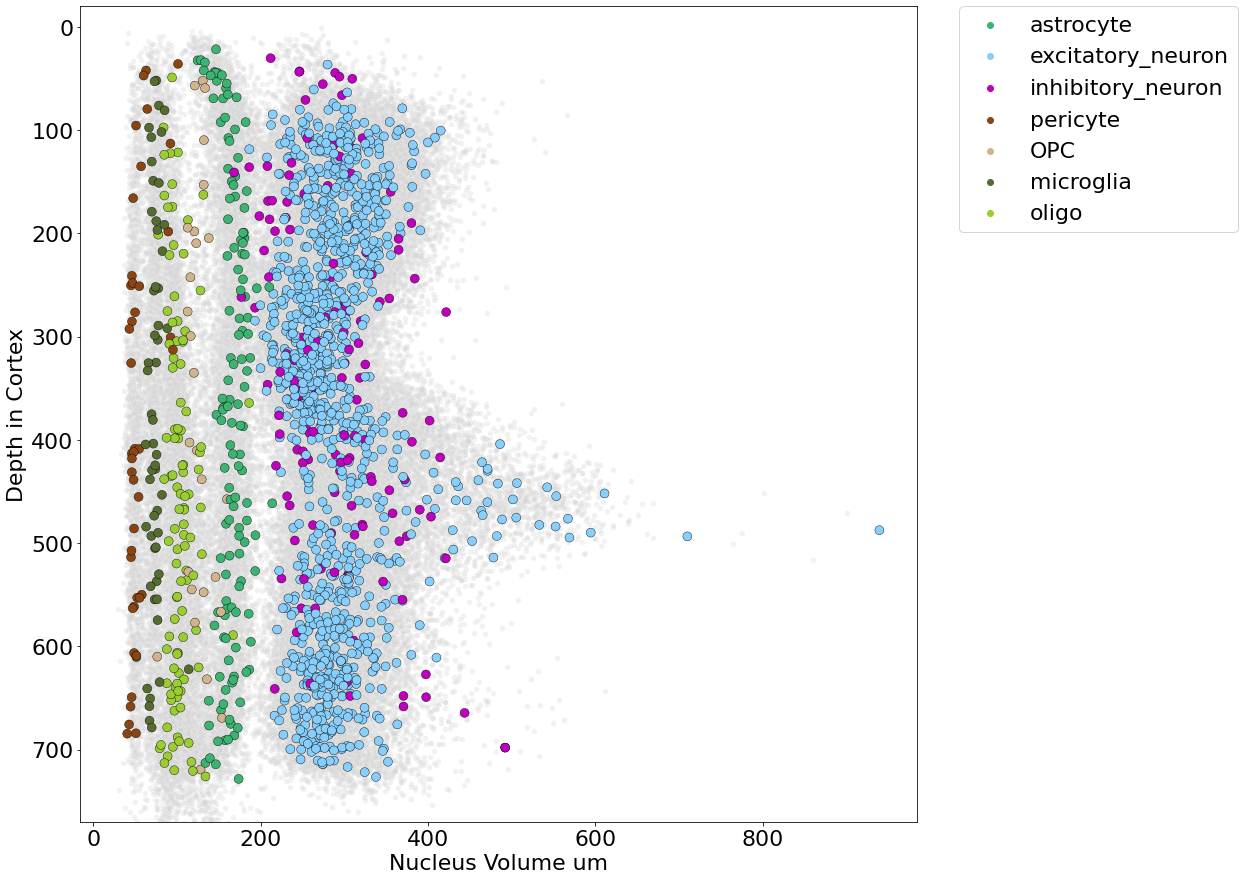

In [42]:
f,ax=plt.subplots(figsize=(15,15))
ax = sns.scatterplot(x='nucleus_volume_um', y='soma_depth_y', data=soma_df[soma_df.cortical_column_labels.isna()],
                     s=30, ax=ax, legend=False, color='lightgray',alpha = 0.3)
sns.scatterplot(x='nucleus_volume_um', y='soma_depth_y', data=soma_df[~soma_df.cortical_column_labels.isna()],
                     s=80, ax=ax, edgecolor="black",linewidth=.4,
                    hue = labels, palette = coarse_color_dict, alpha = 1.0, legend=True)

ax.set_xlabel('Nucleus Volume um')
ax.set_ylabel('Depth in Cortex')
ax.set(ylim=(-20,770))
ax.invert_yaxis()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

How about the fraction of nucleus area within a nuclear fold?

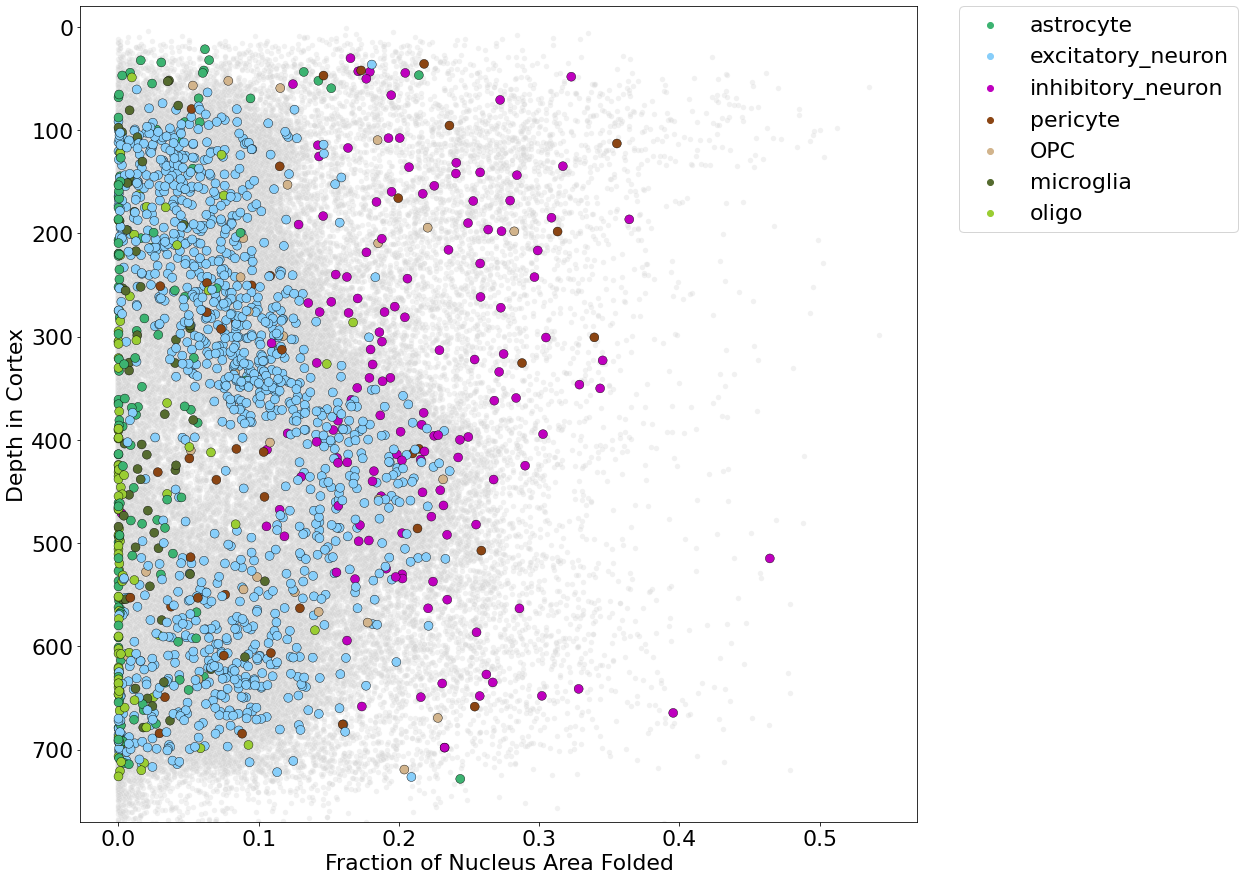

In [43]:
f,ax=plt.subplots(figsize=(15,15))
ax = sns.scatterplot(x='fraction_nuclear_folding', y='soma_depth_y', data=soma_df[soma_df.cortical_column_labels.isna()],
                     s=30, ax=ax, legend=False, color='lightgray',alpha = 0.3)
sns.scatterplot(x='fraction_nuclear_folding', y='soma_depth_y', data=soma_df[~soma_df.cortical_column_labels.isna()],
                     s=80, ax=ax, edgecolor="black",linewidth=.4,
                    hue = labels, palette = coarse_color_dict, alpha = 1.0, legend=True)

ax.set_xlabel('Fraction of Nucleus Area Folded')
ax.set_ylabel('Depth in Cortex')
ax.set(ylim=(-20,770))
ax.invert_yaxis()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

And the somatic synapse density?

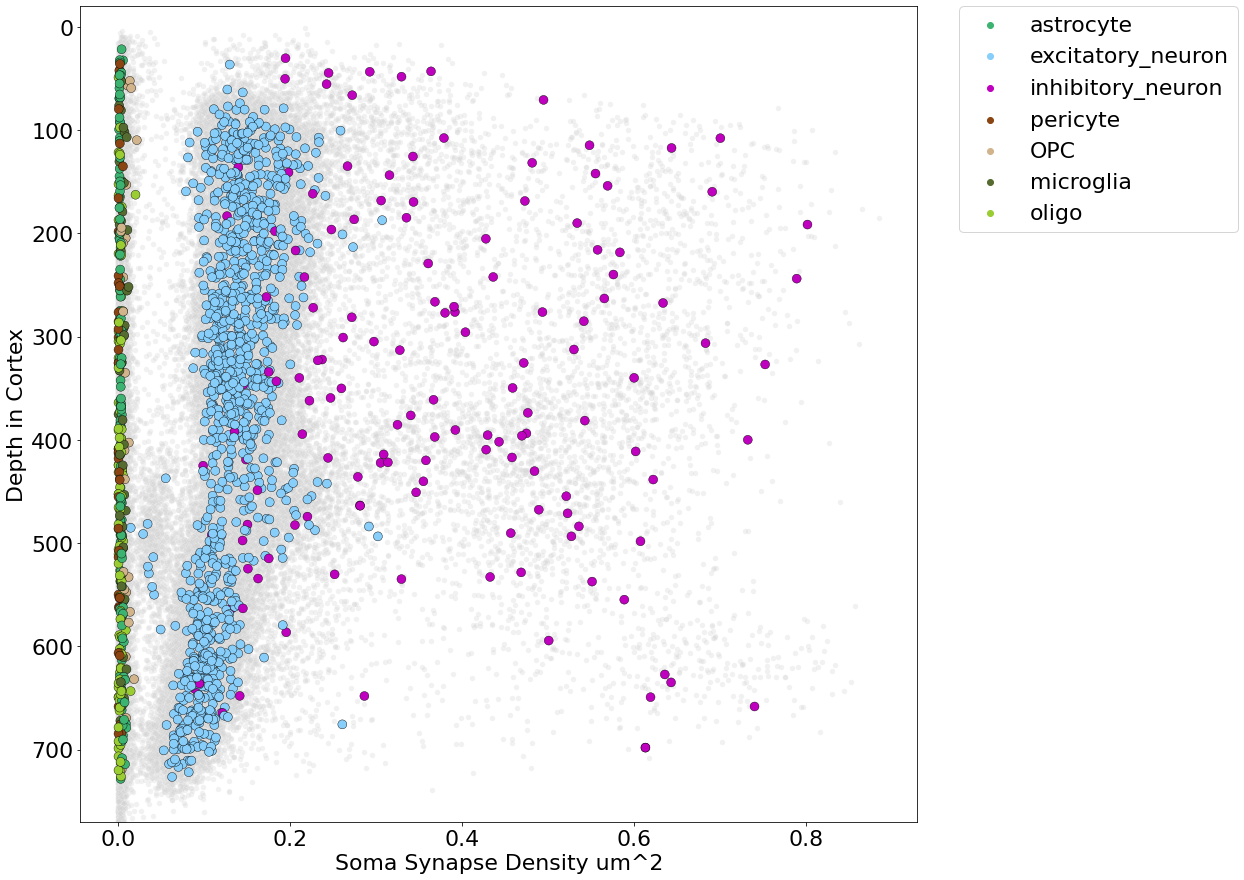

In [44]:
f,ax=plt.subplots(figsize=(15,15))
ax = sns.scatterplot(x='soma_synapse_density_um', y='soma_depth_y', data=soma_df[soma_df.cortical_column_labels.isna()],
                     s=30, ax=ax, legend=False, color='lightgray',alpha = 0.3)
sns.scatterplot(x='soma_synapse_density_um', y='soma_depth_y', data=soma_df[~soma_df.cortical_column_labels.isna()],
                     s=80, ax=ax, edgecolor="black",linewidth=.4,
                    hue = labels, palette = coarse_color_dict, alpha = 1.0, legend=True)


ax.set_xlabel('Soma Synapse Density um^2')
ax.set_ylabel('Depth in Cortex')
ax.set(ylim=(-20,770))
ax.invert_yaxis()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

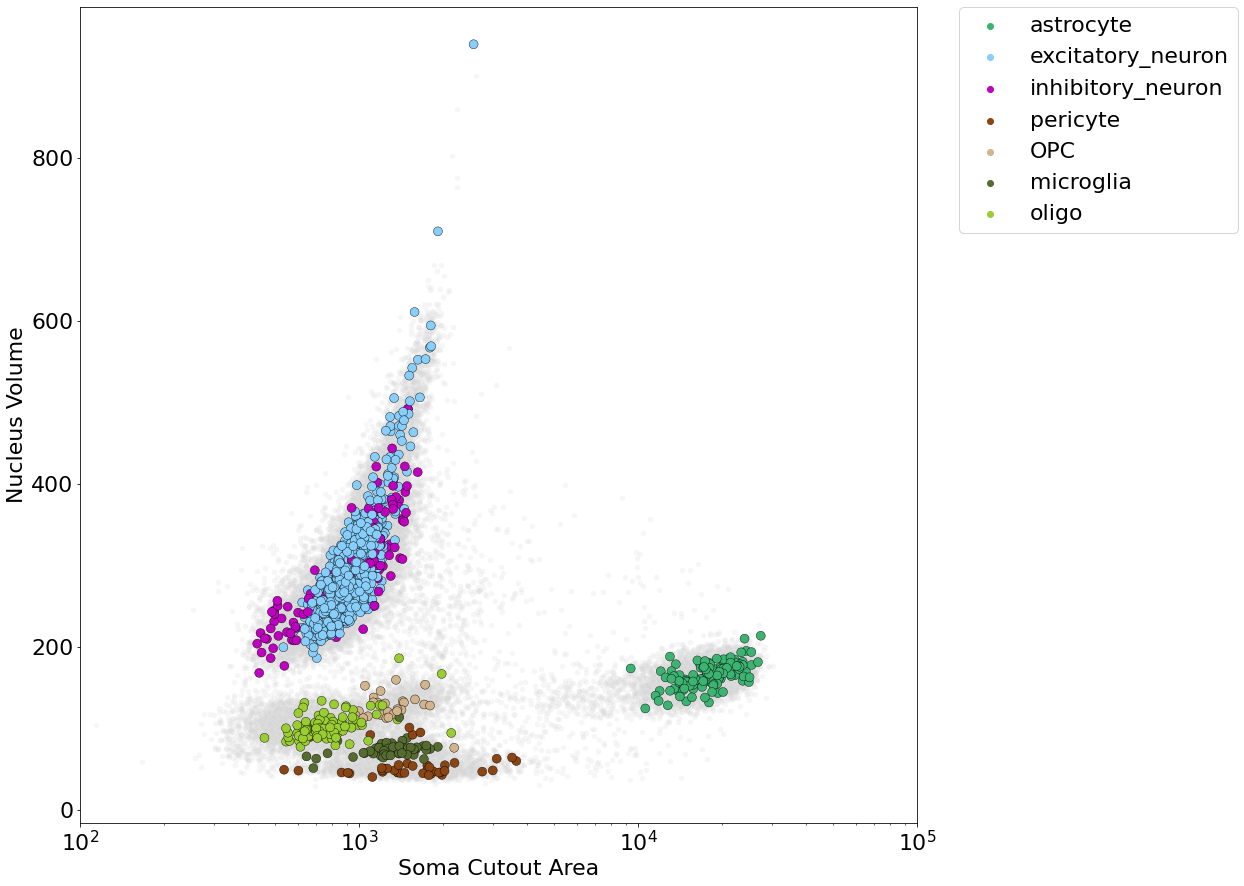

In [45]:
f,ax=plt.subplots(figsize=(15,15))
ax = sns.scatterplot(x='soma_area_um', y='nucleus_volume_um', data=soma_df[soma_df.cortical_column_labels.isna()],
                     s=30, ax=ax, legend=False, color='lightgray', alpha = 0.2)
sns.scatterplot(x='soma_area_um', y='nucleus_volume_um', data=soma_df[~soma_df.cortical_column_labels.isna()],
                     s=80, ax=ax, edgecolor="black",linewidth=.4,
                    hue = labels, palette = coarse_color_dict, alpha = 1.0, legend=True)

ax.set_xscale('log')
ax.set_xlabel('Soma Cutout Area')
ax.set_ylabel('Nucleus Volume')
ax.set(xlim=(100,100000))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### All the features at once

Let's start by looking at the low dimensional embedding of all the features using UMAP.

We have supplied the code we used to get the 2D embedding below, however because UMAP embeddings may vary from one run to the next we have it commented out and will plot the save embeddings to best match the one used in the manuscript. 

In [46]:
metrics = ['soma_depth_y', 'nucleus_volume_um', 'nucleus_area_um',
'nuclear_area_to_volume_ratio', 'nuclear_folding_area_um',
'fraction_nuclear_folding', 'nucleus_to_soma_ratio', 
'soma_volume_um','soma_area_um',
'soma_to_nucleus_center_dist','soma_area_to_volume_ratio', 
'soma_synapse_number','soma_synapse_density_um']

In [47]:
# UMAP Embedding Code below
# soma_features = soma_df[metrics].values
# means_soma=np.mean(soma_features, axis=0)
# stds_soma=np.std(soma_features, axis=0)
# M_soma = (soma_features - means_soma)/stds_soma

# soma_umap = umap.UMAP(min_dist=0, n_epochs=300).fit(M_soma)


# soma_transform_ALL = soma_umap.transform(M_soma)

# df['soma_embedding_0'] =soma_transform_ALL[:,0]
# df['soma_embedding_1'] =soma_transform_ALL[:,1]


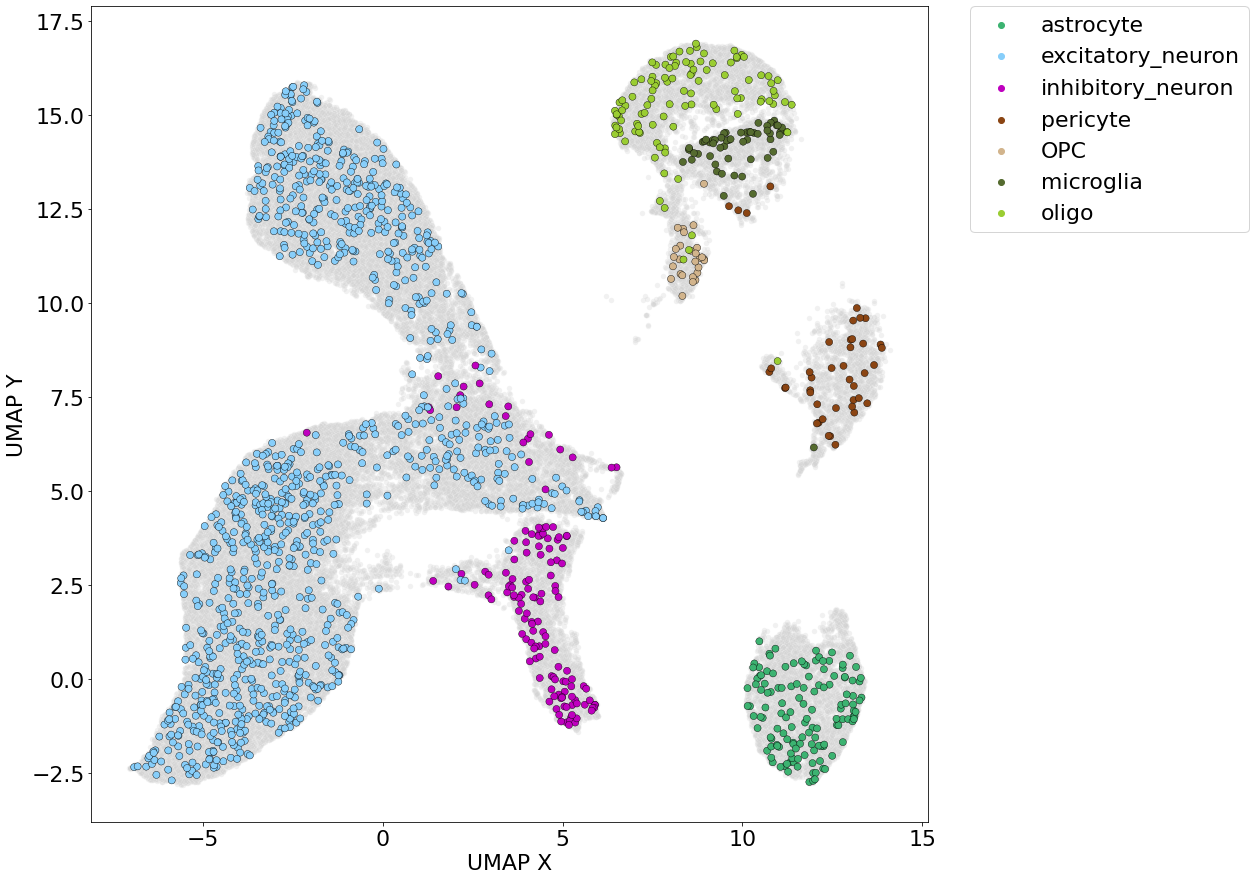

In [49]:
f,ax=plt.subplots(figsize=(15,15))
ax = sns.scatterplot(x='umap_embedding_x', y='umap_embedding_y', data=soma_df[soma_df.cortical_column_labels.isna()],
                     s=30, ax=ax, legend=False, color='lightgray',alpha = 0.3)
sns.scatterplot(x='umap_embedding_x', y='umap_embedding_y', data=soma_df[~soma_df.cortical_column_labels.isna()],
                     s=50, ax=ax, edgecolor="black",linewidth=.4,
                    hue = labels, palette = coarse_color_dict, alpha = 1.0, legend=True)


ax.set_xlabel('UMAP X')
ax.set_ylabel('UMAP Y')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Now let's look at the entire feature matrix for all the labeled cells in the column. Note that in order to see the structure in the matrix we have sorted the cells by their manual labelled cell subclass. 

In [50]:
soma_df.columns

Index(['soma_id', 'nucleus_id', 'soma_depth_x', 'soma_depth_y', 'soma_depth_z',
       'is_column', 'nucleus_volume_um', 'nucleus_area_um',
       'nuclear_area_to_volume_ratio', 'nuclear_folding_area_um',
       'fraction_nuclear_folding', 'nucleus_to_soma_ratio', 'soma_volume_um',
       'soma_area_um', 'soma_to_nucleus_center_dist',
       'soma_area_to_volume_ratio', 'soma_synapse_number',
       'soma_synapse_density_um', 'umap_embedding_x', 'umap_embedding_y',
       'cortical_column_labels', 'predicted_class', 'predicted_subclass'],
      dtype='object')

### Excitatory Cells

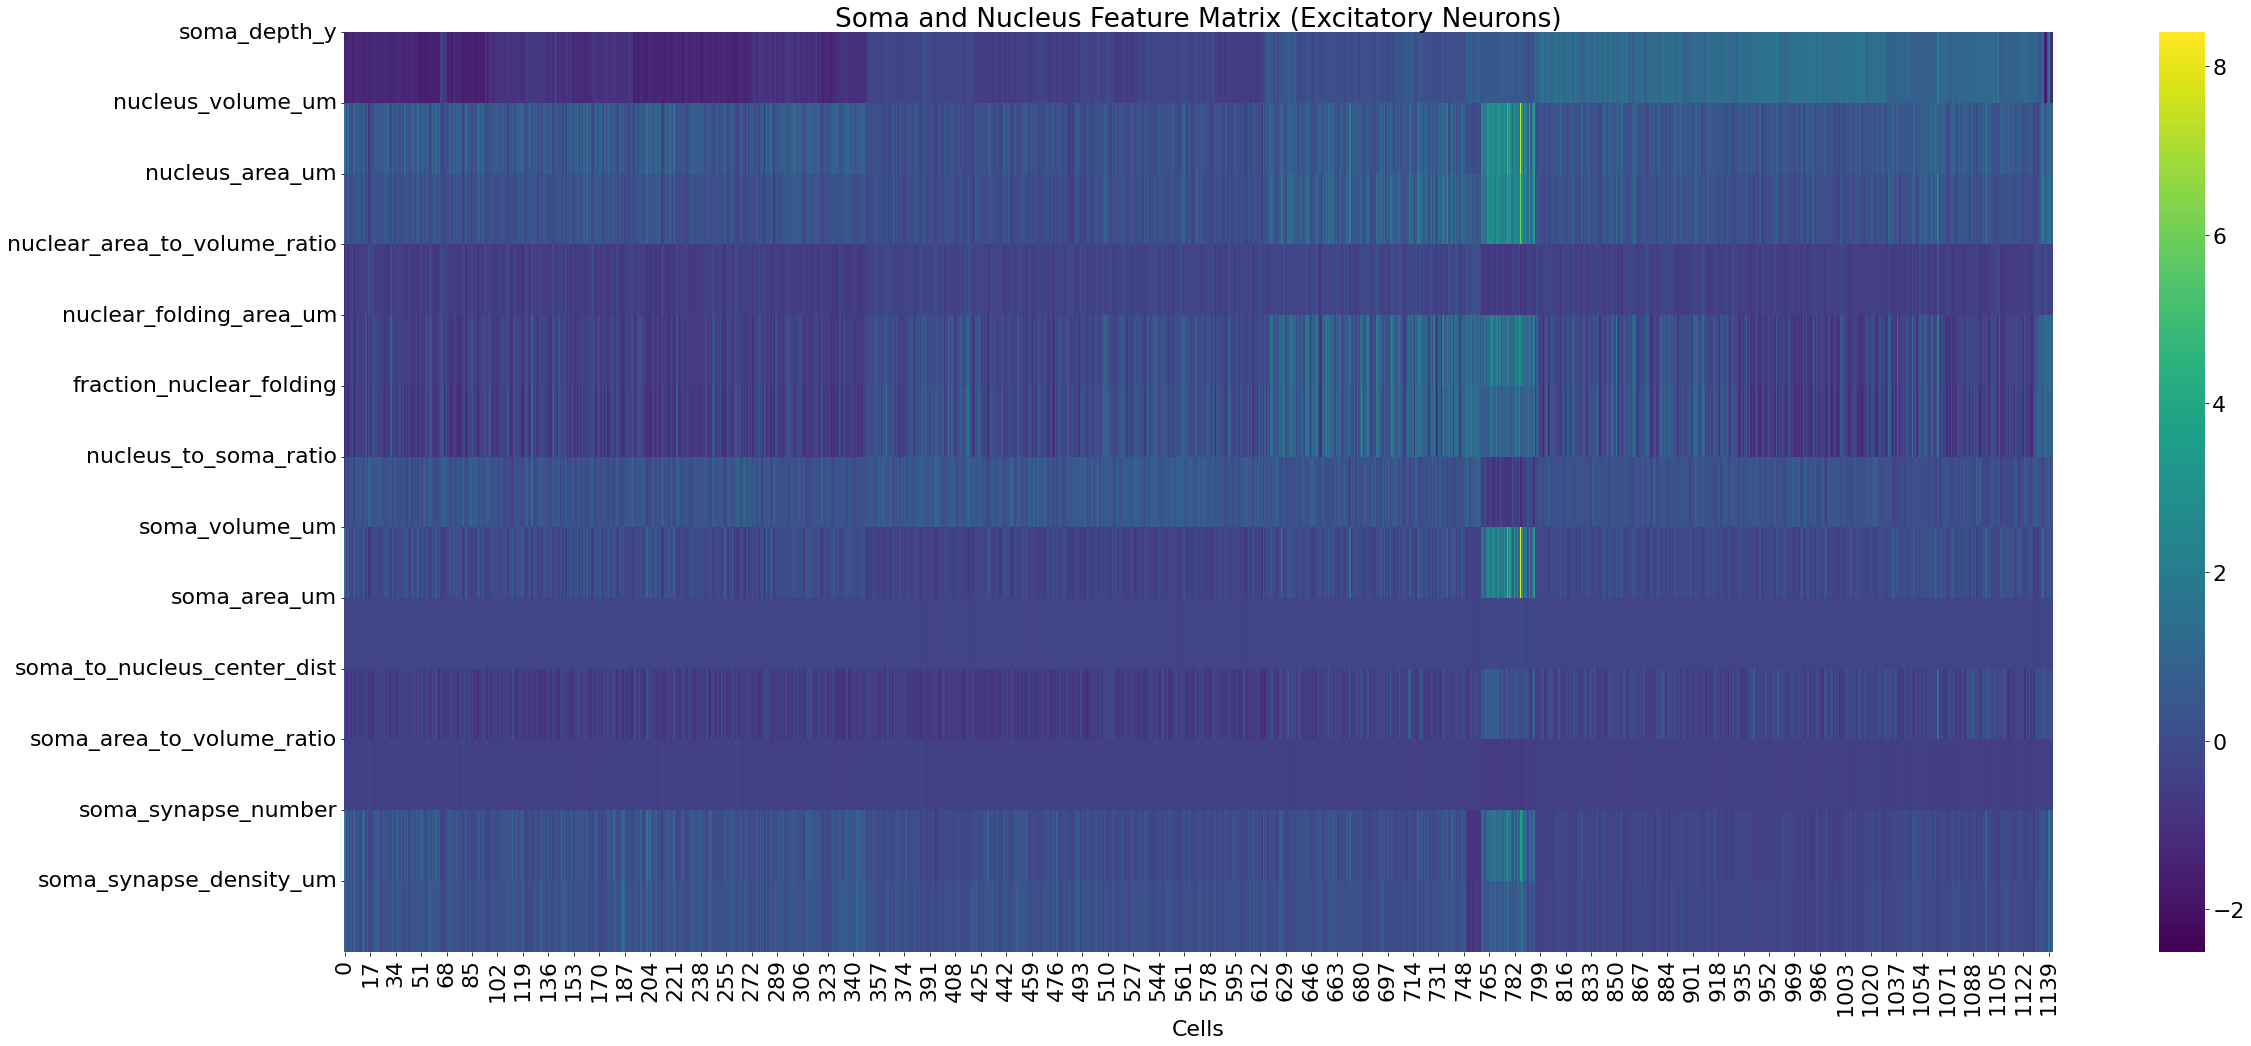

In [65]:
column_df = soma_df[~soma_df.cortical_column_labels.isna()]
subset = column_df.query('predicted_class == "excitatory_neuron"')
sorted_df = subset.sort_values(['cortical_column_labels'])
data_column = sorted_df[metrics]

#zscoring the features by means and std of all the cells as used above
soma_features = soma_df[metrics].values
means_soma=np.mean(soma_features, axis=0)
stds_soma=np.std(soma_features, axis=0)
M_data = (data_column - means_soma)/stds_soma 

fig, ax = plt.subplots(figsize=(35, 15))
im = sns.heatmap(M_data.T, cmap='viridis', vmin=-2.5, vmax=8.4)

ax.set_yticks(np.arange(len(metrics)))
ax.set_yticklabels(metrics,rotation=0)
ax.set_xlabel('Cells')

ax.set_title("Soma and Nucleus Feature Matrix (Excitatory Neurons)")
fig.tight_layout()
plt.show()


### Inhibitory Cells

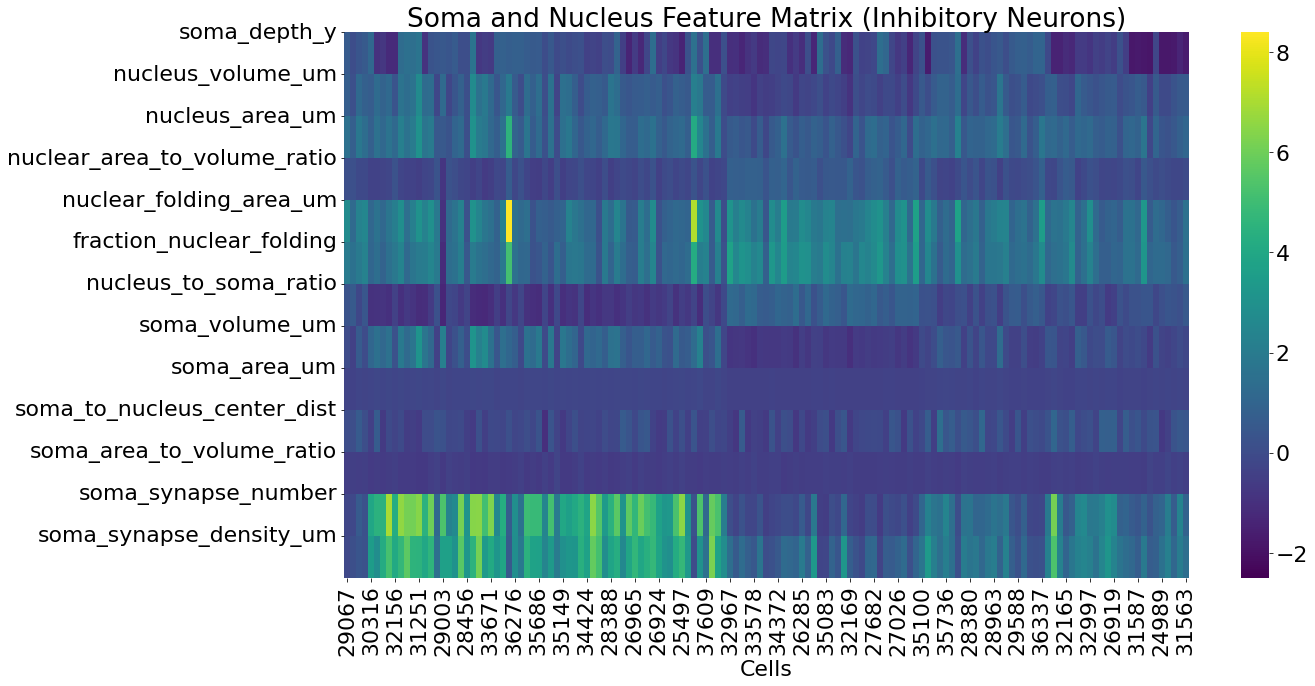

In [68]:
column_df = soma_df[~soma_df.cortical_column_labels.isna()]
subset = column_df.query('predicted_class == "inhibitory_neuron"')
sorted_df = subset.sort_values(['cortical_column_labels'])
data_column = sorted_df[metrics]

#zscoring the features by means and std of all the cells as used above
soma_features = soma_df[metrics].values
means_soma=np.mean(soma_features, axis=0)
stds_soma=np.std(soma_features, axis=0)
M_data = (data_column - means_soma)/stds_soma 

fig, ax = plt.subplots(figsize=(20, 10))
im = sns.heatmap(M_data.T, cmap='viridis', vmin=-2.5, vmax=8.4)

ax.set_yticks(np.arange(len(metrics)))
ax.set_yticklabels(metrics,rotation=0)
ax.set_xlabel('Cells')

ax.set_title("Soma and Nucleus Feature Matrix (Inhibitory Neurons)")
fig.tight_layout()
plt.show()

### Nonneurons

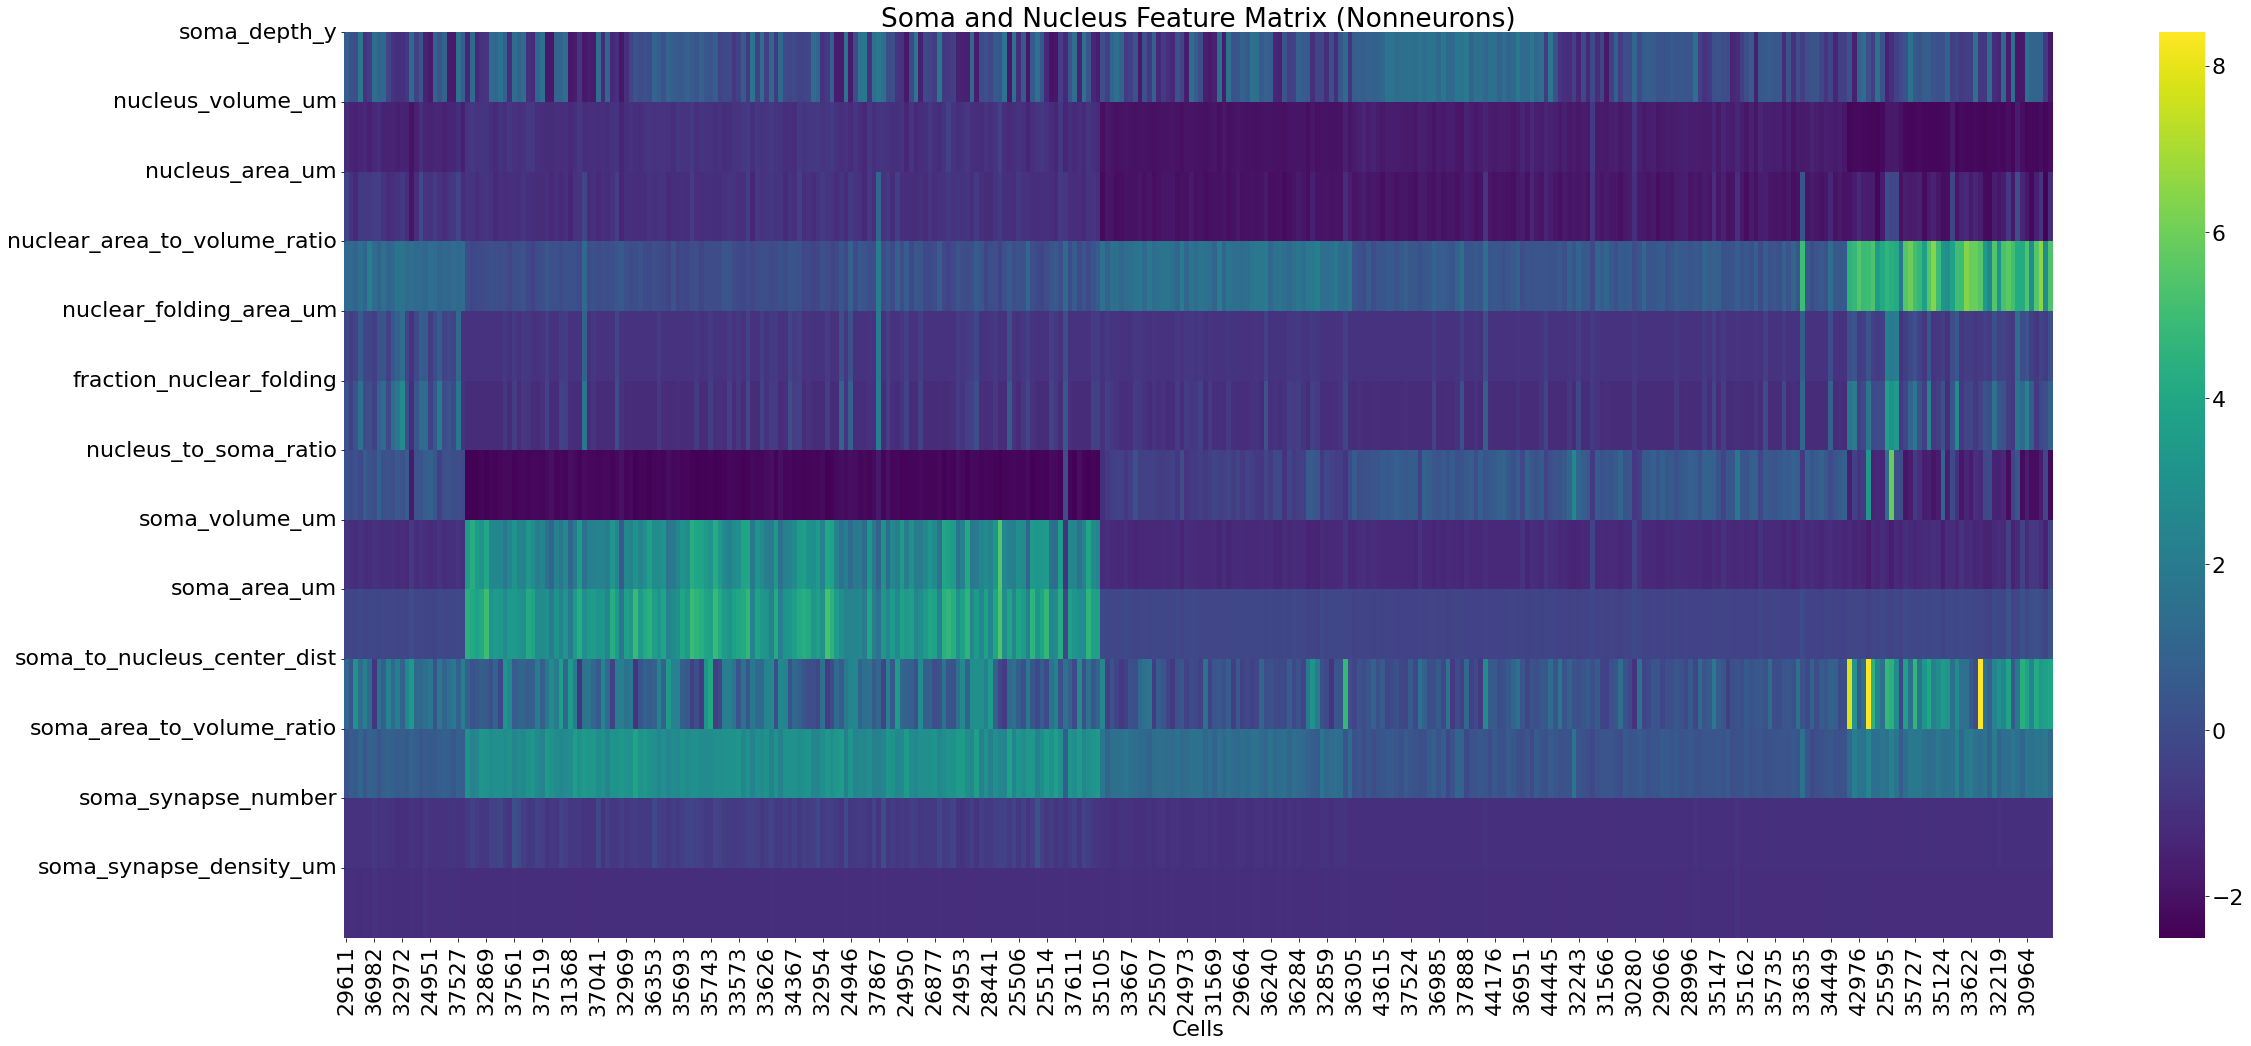

In [69]:
column_df = soma_df[~soma_df.cortical_column_labels.isna()]
subset = column_df.query('predicted_class == "nonneuron"')
sorted_df = subset.sort_values(['cortical_column_labels'])
data_column = sorted_df[metrics]

#zscoring the features by means and std of all the cells as used above
soma_features = soma_df[metrics].values
means_soma=np.mean(soma_features, axis=0)
stds_soma=np.std(soma_features, axis=0)
M_data = (data_column - means_soma)/stds_soma 

fig, ax = plt.subplots(figsize=(35, 15))
im = sns.heatmap(M_data.T, cmap='viridis', vmin=-2.5, vmax=8.4)

ax.set_yticks(np.arange(len(metrics)))
ax.set_yticklabels(metrics,rotation=0)
ax.set_xlabel('Cells')

ax.set_title("Soma and Nucleus Feature Matrix (Nonneurons)")
fig.tight_layout()
plt.show()

In [16]:
color_dict = {'23P':'#8268DC',
              '4P':'#647FDC',
              '5P-IT':'#77BCDE',
              '5P-ET':'#87DD90',
              '5P-NP':'#85DEC9',
              '6P-CT':'#96DD70',
              '6P-IT':'#DCC86E',
              'BC':'#D68C66',
              'BPC':'#D3697C',
              'MC':'#D36BBA',
              'NGC':'#BC6BDB',
              'astrocyte':'#009245',
              'pericyte':'#754C24',
              'microglia':'#006837',
              'oligo':'#8CC63F',
              'OPC':'#998675',
              'error':'#899499'
    
}


In [20]:
minnie_column.classification_system_manual.value_counts()

aibs_coarse_excitatory     1132
aibs_coarse_nonneuronal     366
aibs_coarse_inhibitory      149
Name: classification_system_manual, dtype: int64

In [31]:
minnie_gray.shape

(92314, 67)

No handles with labels found to put in legend.


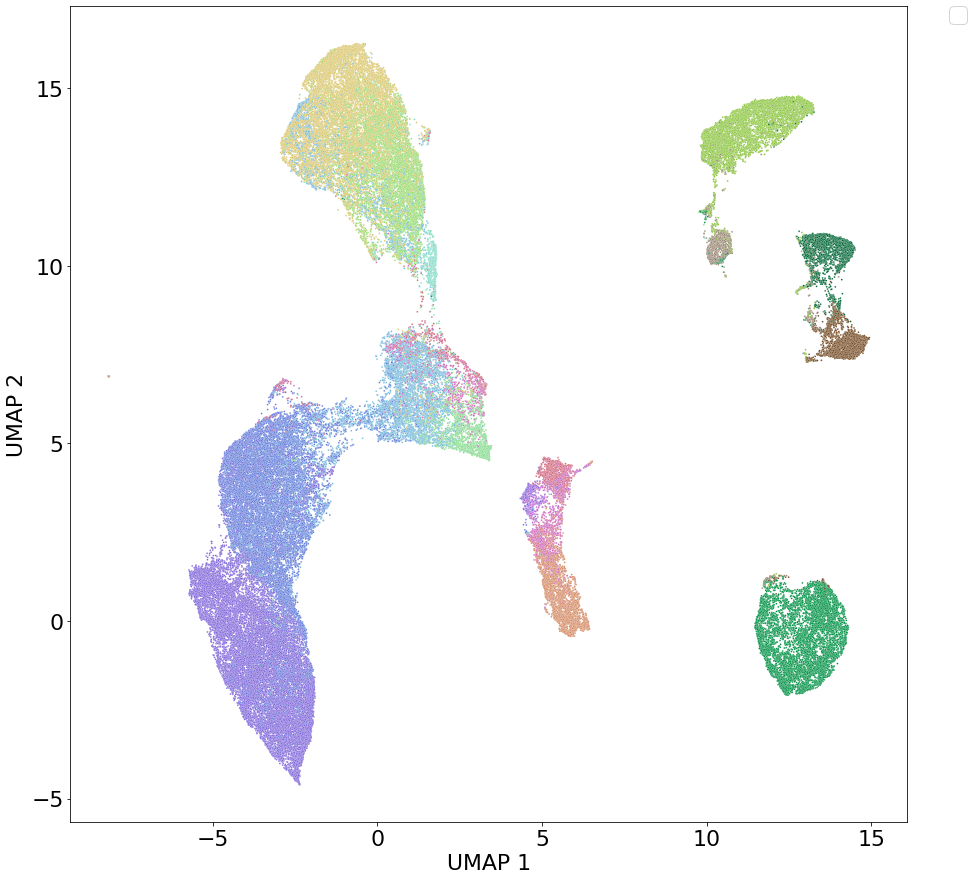

In [26]:
minnie_gray = df[df.class_labels.isna()]
minnie_column = df[~df.class_labels.isna()]

minnie_column_neurons = minnie_column.query('classification_system_manual!="aibs_coarse_nonneuronal"')
sorted_minnie_column_neurons = minnie_column_neurons.sort_values('cell_type_manual', ascending=False)
f,ax=plt.subplots(figsize=(15,15))

ax = sns.scatterplot(x='soma_minnie_embedding_0', y='soma_minnie_embedding_1', data=df,#.query('soma_minnie_embedding_0>3'),
                     s=3, ax=ax, legend=False, hue='cell_type',
                    palette=color_dict, alpha = 1)
# sns.scatterplot(x='soma_minnie_embedding_1', y='soma_minnie_embedding_0', data=soma_minnie_column,
#                      s=20, ax=ax, 
#                     hue = 'class_labels', palette = coarse_color_dict, alpha = 1.0, legend=True)

# sns.scatterplot(x='soma_minnie_embedding_0', y='soma_minnie_embedding_1', data=minnie_column,
#                      s=50, ax=ax, palette = coarse_color_dict,edgecolors='black',
#                     hue = 'class_labels', alpha = 0.8, legend=True)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='UMAP 1', ylabel='UMAP 2')
f.savefig('/Users/leilae/Documents/Mouse_connectomics/Soma_Nuc_paper/Figures/v661/Fig3_metamodel_umap_Noerrors.png', bbox_inches="tight")

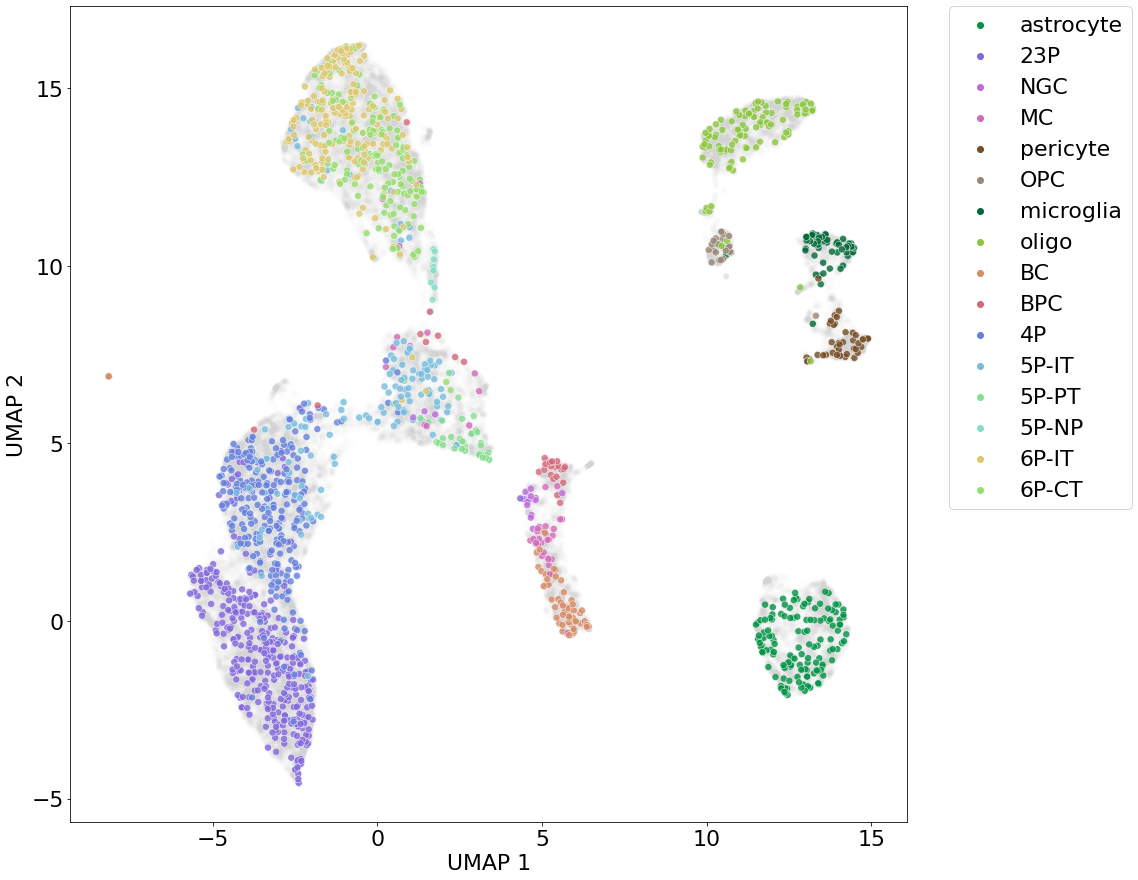

In [37]:
minnie_column_neurons = soma_minnie_column.query('classification_system_manual!="aibs_coarse_nonneuronal"')
sorted_minnie_column_neurons = minnie_column_neurons.sort_values('cell_type_manual', ascending=False)
f,ax=plt.subplots(figsize=(15,15))

ax = sns.scatterplot(x='soma_minnie_embedding_0', y='soma_minnie_embedding_1', data=soma_minnie_gray,#.query('soma_minnie_embedding_0>3'),
                     s=30, ax=ax, legend=False, hue='class_labels',
                    c=c_unsure, alpha = 0.02)
# sns.scatterplot(x='soma_minnie_embedding_1', y='soma_minnie_embedding_0', data=soma_minnie_column,
#                      s=20, ax=ax, 
#                     hue = 'class_labels', palette = coarse_color_dict, alpha = 1.0, legend=True)

remove = ['Unsure E', 'Unsure I', '6P-U', 'WM-P']
sns.scatterplot(x='soma_minnie_embedding_0', y='soma_minnie_embedding_1', 
                data=soma_minnie_column.query('cell_type_manual not in @remove'),
                     s=50, ax=ax, palette = color_dict,edgecolors='black',
                    hue = 'cell_type_manual', alpha = 0.8, legend=True)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='UMAP 1', ylabel='UMAP 2')
f.savefig('/Users/leilae/Documents/Mouse_connectomics/Soma_Nuc_paper/Figures/v661/Fig3_soma_umap_Noerrors_w_CT.png', bbox_inches="tight")

In [169]:
metrics = ['transformed_y_nm',
 'nucleus_area_norm',
 'nucleus_volume_norm',
 'nucleus_area_to_volume_ratio_norm', 
           
 'fold_area_nm_norm',
 'fract_fold_norm',
           
 'soma_volume_norm',
 'soma_area_norm',
 'nucleus_to_soma_norm',
 'soma_nuc_d_norm',
 'soma_area_to_volume_ratio_norm',
 'n_soma_syn_norm',
 'soma_syn_density_microns_norm']

In [132]:

soma_minnie = minnie[metrics].values
soma_column = soma_minnie_column[metrics].values

means_soma_minnie=np.mean(soma_minnie, axis=0)
stds_soma_minnie=np.std(soma_minnie, axis=0)

soma_column.shape

(1696, 13)

In [133]:
subset_column.class_labels

22927    aibs_coarse_excitatory
22218    aibs_coarse_excitatory
22219    aibs_coarse_excitatory
22240    aibs_coarse_excitatory
22241    aibs_coarse_excitatory
                  ...          
23616    aibs_coarse_excitatory
30708    aibs_coarse_excitatory
33250    aibs_coarse_excitatory
33249    aibs_coarse_excitatory
33254    aibs_coarse_excitatory
Name: class_labels, Length: 1168, dtype: object

(1696, 61)


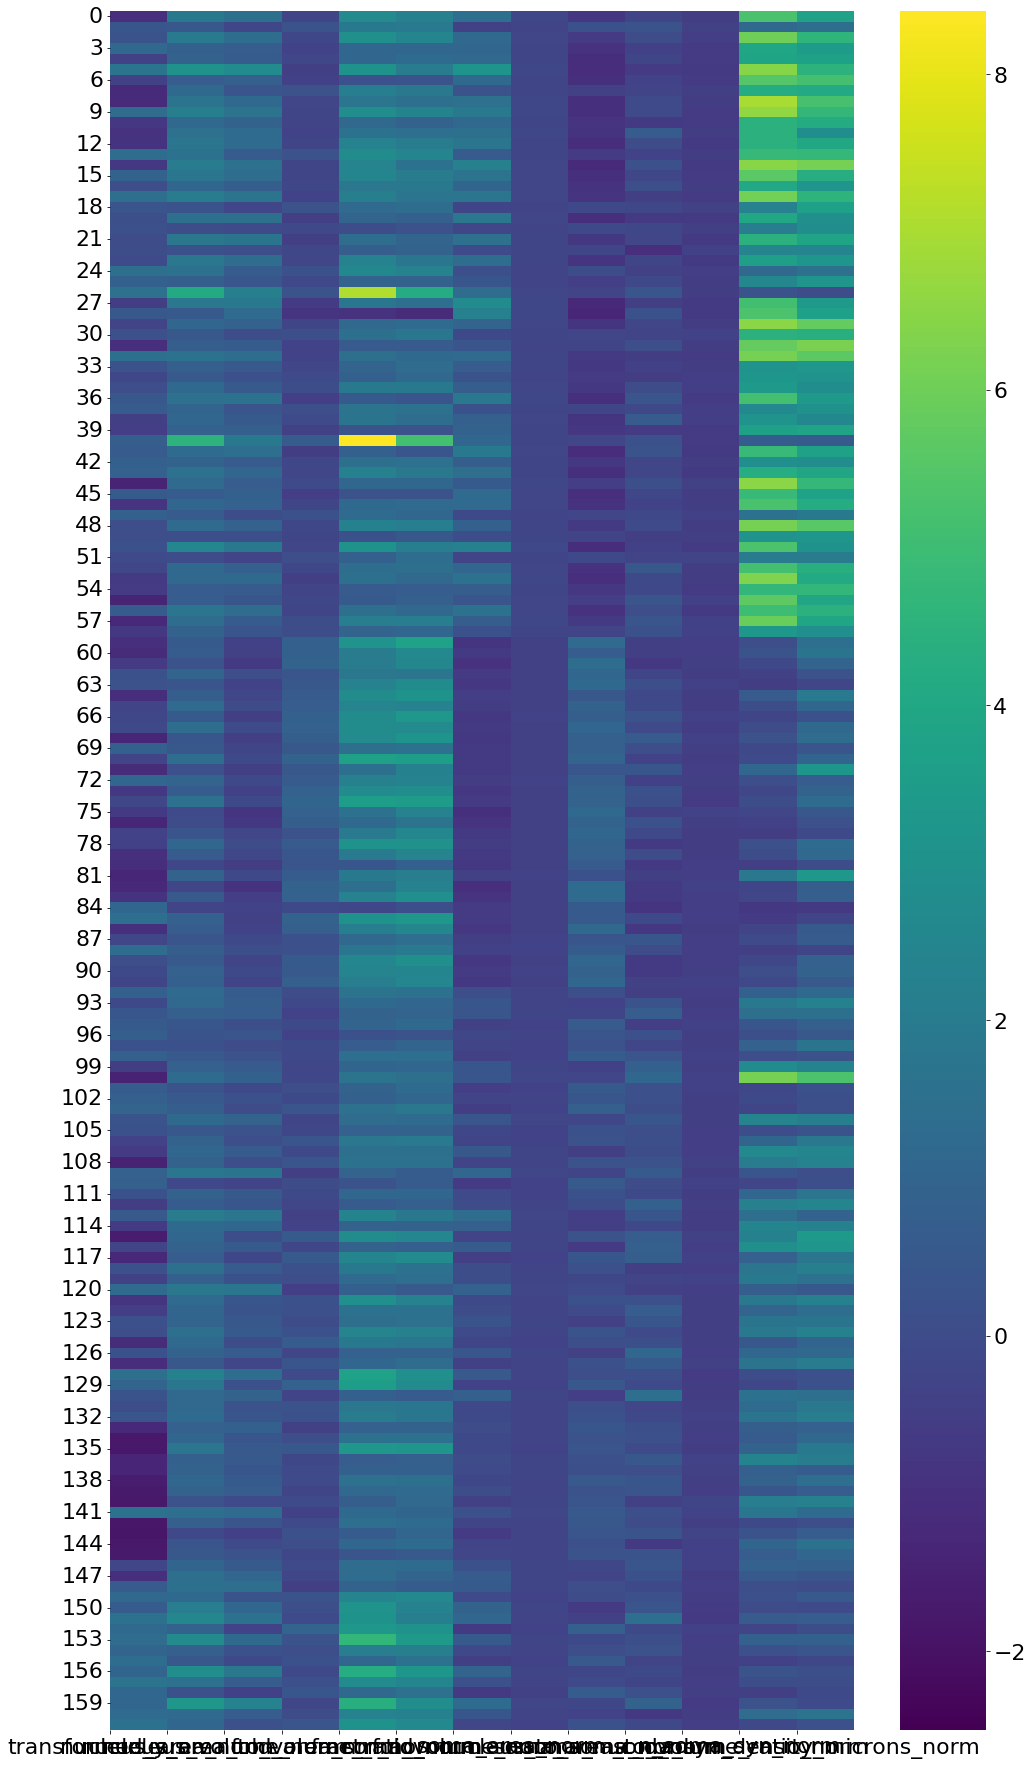

In [135]:
sorted_df = minnie_column.sort_values('cell_type_manual') #.query('class_labels=="Excitatory"').sort_values('cell_type')
print(sorted_df.shape)
subset_column = sorted_df.query('class_labels=="aibs_coarse_inhibitory"').sort_values('cell_type_manual')
data_column = subset_column[metrics].values#[1151:,:]
M_data_column = (data_column - means_soma_minnie)/stds_soma_minnie
max_score = np.max(M_data_column)
labels = sorted_df.cell_type_manual.unique()

fig, ax = plt.subplots(figsize=(15, 25))
im = sns.heatmap(M_data_column, cmap='viridis', vmin=-2.5, vmax=8.4)

# Show all ticks and label them with the respective list entries
#ax.set_yticks(np.arange(len(labels)))
#ax.set_yticklabels(labels)
ax.set_xticks(np.arange(len(metrics)))
ax.set_xticklabels(metrics)

# #Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45,
#          rotation_mode="anchor")
# plt.setp(ax.get_yticklabels(), rotation=45,
#          rotation_mode="anchor")

# #Loop over data dimensions and create text annotations.
# for i in range(len(metrics_m)):
#     for j in range(len(labels)):
#         text = ax.text(j, i, M_data_column[i, j],
#                        ha="center", va="center", color="w")

#ax.set_title("Soma and Nucleus Feature Matrix")
fig.tight_layout()
#fig.savefig('/Users/leilae/Documents/Mouse_connectomics/Soma_Nuc_paper/Figures/ex_feat_matrix_soma_inh.png', bbox_inches="tight")
plt.show()


In [306]:
subset_column.cell_type.value_counts()

23P      346
4P       263
6P-IT    179
6P-CT    145
5P-IT    137
5P-PT     33
6P-U      27
5P-NP     10
Name: cell_type, dtype: int64

In [308]:
subset_column.shape

(1144, 67)

In [296]:
sum(subset_column.sort_values('cell_type').cell_type.value_counts())

150

In [297]:
sorted_df.class_labels.value_counts()#query('class_labels=="Inhibitory"').shape

Excitatory    1144
Inhibitory     165
astrocyte      135
oligo           96
pericyte        40
microglia       31
OPC             23
Name: class_labels, dtype: int64

In [276]:
minnie_column.class_labels.value_counts()

Excitatory    1151
Inhibitory     150
astrocyte      135
oligo           96
pericyte        40
microglia       31
OPC             23
Name: class_labels, dtype: int64

In [68]:
minnie_column.cell_type.value_counts()

23P          346
4P           263
6P-IT        179
6P-CT        143
5P-IT        137
astrocyte    135
oligo         96
BC            50
pericyte      40
MC            37
Unsure I      33
5P-PT         33
microglia     31
BPC           29
6P-U          27
OPC           23
5P-NP         21
NGC           12
Unsure E       4
Name: cell_type, dtype: int64

## Supplemental Figures

In [21]:
cell_merged_minnie = pd.read_pickle('/Users/leilae/aibs/Neural_coding/data/cell_merged_minnie_features_w_embedding_011822.pkl')

In [22]:
cell_merged_minnie.classification_system.value_counts()

aibs_coarse_excitatory     1151
aibs_coarse_nonneuronal     325
aibs_coarse_inhibitory      150
Name: classification_system, dtype: int64

In [23]:
metrics

['nucleus_area_norm',
 'nucleus_area_to_volume_ratio_norm',
 'fold_area_nm_norm',
 'fract_fold_norm',
 'nucleus_to_soma_norm',
 'nucleus_volume_norm',
 'transformed_y_nm',
 'soma_volume_norm',
 'soma_area_norm',
 'soma_nuc_d_norm',
 'soma_area_to_volume_ratio_norm',
 'n_soma_syn_norm',
 'soma_syn_density_microns_norm']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

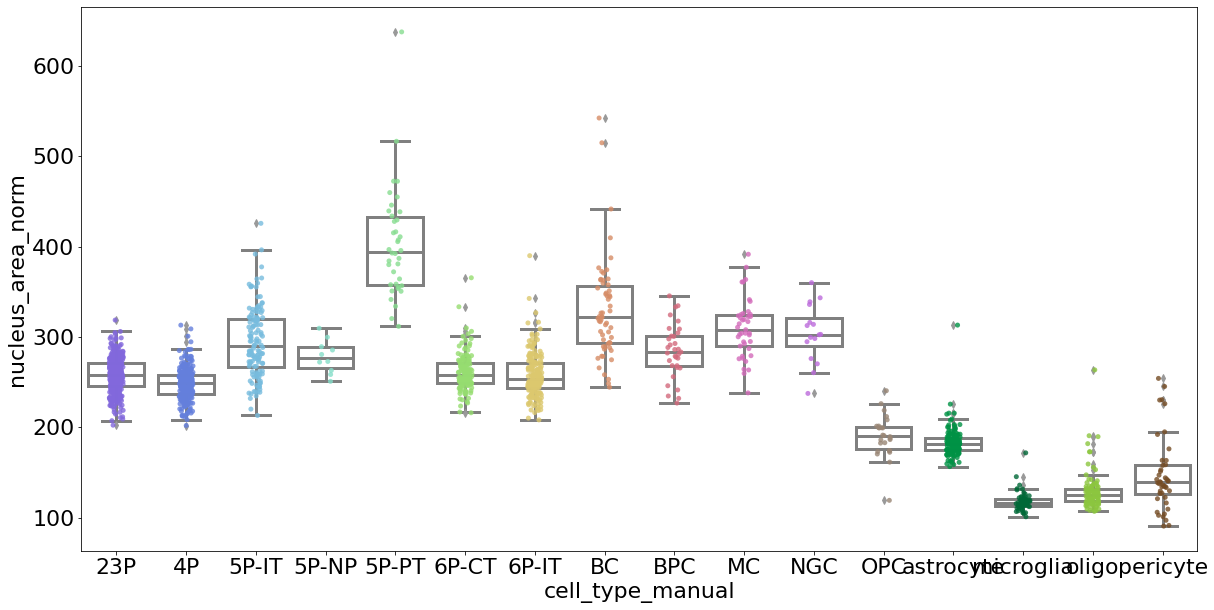

In [26]:
remove = ['Unsure E', 'Unsure I', 'WM-P', 'Unsure','6P-U']
minnie = minnie.query('cell_type_manual not in @remove')
color_dict = {'23P':'#8268DC',
              '4P':'#647FDC',
              '5P-IT':'#77BCDE',
              '5P-PT':'#87DD90',
              '5P-NP':'#85DEC9',
              '6P-CT':'#96DD70',
              '6P-IT':'#DCC86E',
              'BC':'#D68C66',
              'BPC':'#D3697C',
              'MC':'#D36BBA',
              'NGC':'#BC6BDB',
              'astrocyte':'#009245',
              'pericyte':'#754C24',
              'microglia':'#006837',
              'oligo':'#8CC63F',
              'OPC':'#998675',
              'error':'#899499'
    
}

for i in metrics[:1]:
    f, ax = plt.subplots(figsize=(20,10))
    ax = sns.stripplot(x='cell_type_manual', y=i,  data=minnie.sort_values('cell_type_manual'), 
                  hue = 'cell_type_manual', palette = color_dict, ax=ax, s=5, alpha=0.8)

    ax = sns.boxplot(x="cell_type_manual", y=i, data=minnie.sort_values('cell_type_manual'),
                    color = 'white',linewidth=3, ax=ax)
    for ix,box in enumerate(ax.artists):
        box.set_edgecolor('gray')
        box.set_facecolor('white')

        #iterate over whiskers and median lines
        for j in range(6*ix,6*(ix+1)):
             ax.lines[j].set_color('gray')

    if i == 'transformed_y_nm':
        plt.gca().invert_yaxis()
    ax.legend().remove()
    filename = '/Users/leilae/Documents/Mouse_connectomics/Soma_Nuc_paper/Figures/v661/SuppFig_minnie_stripplot_boxplot_%s.eps'%(i)
    f.savefig(filename, bbox_inches="tight")

In [ ]:
remove = ['Unsure E', 'Unsure I', 'WM-P', 'Unsure','6P-U']
minnie = minnie.query('cell_type_manual not in @remove')
color_dict = {'23P':'#8268DC',
              '4P':'#647FDC',
              '5P-IT':'#77BCDE',
              '5P-PT':'#87DD90',
              '5P-NP':'#85DEC9',
              '6P-CT':'#96DD70',
              '6P-IT':'#DCC86E',
              'BC':'#D68C66',
              'BPC':'#D3697C',
              'MC':'#D36BBA',
              'NGC':'#BC6BDB',
              'astrocyte':'#009245',
              'pericyte':'#754C24',
              'microglia':'#006837',
              'oligo':'#8CC63F',
              'OPC':'#998675',
              'error':'#899499'
    
}

neurons = minnie.query('classification_system_manual != "aibs_coarse_nonneuronal"')
for i in metrics[1:]:
    f, ax = plt.subplots(figsize=(20,10))
    ax = sns.stripplot(x='cell_type_manual', y=i,  data=neurons.sort_values('cell_type_manual'), 
                  hue = 'cell_type_manual', palette = color_dict, ax=ax, s=5, alpha=0.8)

    ax = sns.boxplot(x="cell_type_manual", y=i, data=neurons.sort_values('cell_type_manual'),
                    color = 'white',linewidth=3, ax=ax)
    for ix,box in enumerate(ax.artists):
        box.set_edgecolor('gray')
        box.set_facecolor('white')

        #iterate over whiskers and median lines
        for j in range(6*ix,6*(ix+1)):
             ax.lines[j].set_color('gray')

    if i == 'transformed_y_nm':
        plt.gca().invert_yaxis()
    ax.legend().remove()
    filename = '/Users/leilae/Documents/Mouse_connectomics/Soma_Nuc_paper/Figures/v661/SuppFig_minnie_stripplot_boxplot_neurons_%s'%(i)
    f.savefig(filename, bbox_inches="tight")

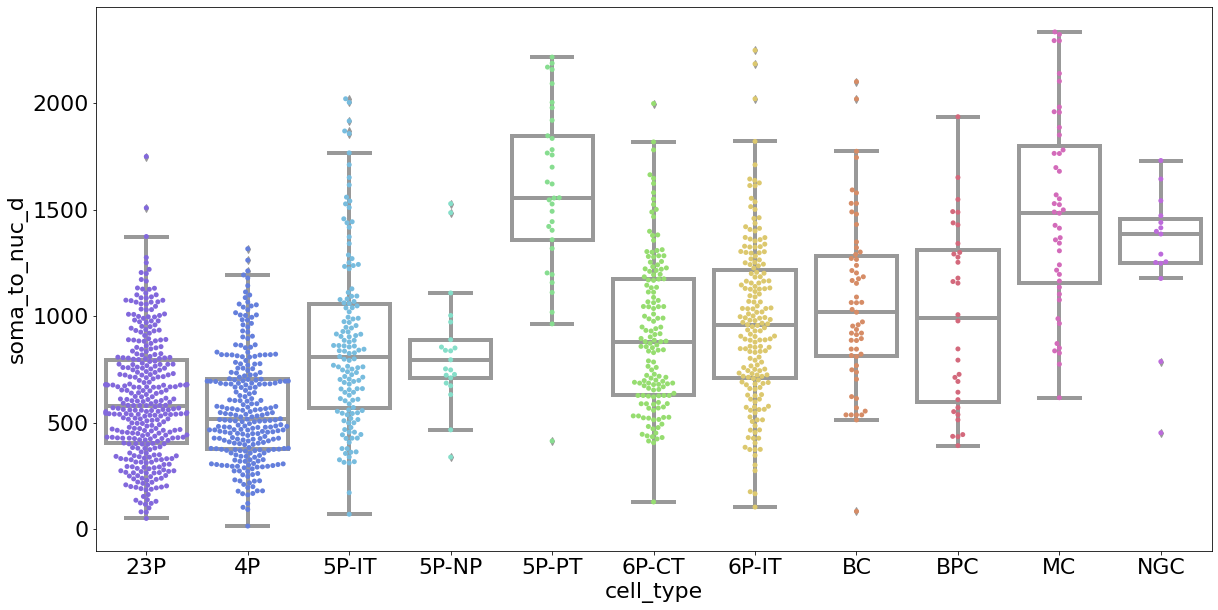

In [74]:
f, ax = plt.subplots(figsize=(20,10))

remove = ['Unsure E', 'Unsure I', 'WM-P', 'Unsure','6P-U']
minnie = minnie.query('cell_type_manual not in @remove')
color_dict = {'23P':'#8268DC',
              '4P':'#647FDC',
              '5P-IT':'#77BCDE',
              '5P-PT':'#87DD90',
              '5P-NP':'#85DEC9',
              '6P-CT':'#96DD70',
              '6P-IT':'#DCC86E',
              'BC':'#D68C66',
              'BPC':'#D3697C',
              'MC':'#D36BBA',
              'NGC':'#BC6BDB',
              'astrocyte':'#009245',
              'pericyte':'#754C24',
              'microglia':'#006837',
              'oligo':'#998675',
              'OPC':'#8CC63F',
              'error':'#899499'
             }

i = 12
ax = sns.swarmplot(x='cell_type_manual', y=metrics[i],  data=cell_merged_minnie.sort_values('cell_type'), 
                  hue = cell_merged_minnie.cell_type, palette = color_dict, ax=ax, s=5)
ax = sns.boxplot(x="cell_type", y=metrics[i], data=cell_merged_minnie.sort_values('cell_type'),
                color = 'white',linewidth=4, ax=ax)
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')
ax.legend().remove()


#plt.gca().invert_yaxis()
filename = '../../Figures/Supplemental_figures/minnie_swarmplot_boxplot_celltype_%s_neurons.eps'%(metrics[i])
f.savefig(filename, bbox_inches="tight")

In [38]:
basil.columns

Index(['is_watertight', 'soma_synapses', 'nucleus_area', 'nucleus_area_fixed',
       'nucleus_area_to_volume', 'nucleus_area_to_volume_fixed',
       'nucleus_avg_depth', 'nucleus_avg_depth_fixed',
       'nucleus_avg_depth_withFix', 'nucleus_center_mass_nm',
       'nucleus_center_mass_nm_fixed', 'nucleus_fold_area',
       'nucleus_fold_area_fixed', 'nucleus_fract_fold',
       'nucleus_fract_fold_fixed', 'nucleus_id', 'nucleus_volume',
       'nucleus_volume_fixed', 'soma_area', 'soma_area_to_volume',
       'soma_center_mass', 'soma_id', 'soma_syn_density', 'soma_volume', 'y',
       'nucleus_area_largest', 'nucleus_area_to_volume_largest',
       'nucleus_avg_depth_largest', 'nucleus_center_mass_nm_largest',
       'nucleus_fold_area_largest', 'nucleus_fract_fold_largest',
       'nucleus_volume_largest', 'nucleus_to_soma', 'nucleus_to_soma_fixed',
       'nucleus_to_soma_largest', 'Tags_LE', 'ct_num', 'visible',
       'outline_color', 'outline_width', 'center_ng', 'Tags_FC', 'Q

In [39]:
basil.nucleus_center_mass_nm_largest - basil.soma_center_mass

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [41]:
basil['soma_y_nm'] = [i[1] for i in basil.soma_center_mass]
basil['nuc_y_nm'] = [i[1] for i in basil.soma_center_mass]

0       [113954.24413844301, 844179.2751919833, 28766....
1       [348000.2455458609, 453503.79373736575, 31945....
2       [309292.6765567683, 125766.21545339988, 22981....
3       [164860.06620669275, 201034.5062590683, 12381....
4       [580737.3886402638, 534631.9487335066, 14806.9...
                              ...                        
2145    [446514.27730232343, 216931.69086159533, 30869...
2146    [352587.7918153385, 916808.7593380935, 11468.7...
2147    [453958.61492718424, 541102.4682118827, 17912....
2148    [639983.0841450598, 533130.9377965446, 28465.7...
2149    [167141.88665936788, 691427.4478029691, 12226....
Name: soma_center_mass, Length: 2148, dtype: object

In [47]:
dists = []

for ix, i in basil.iterrows():
    nuc = np.array(i.nucleus_center_mass_nm)
    soma = np.array(i.soma_center_mass)
    #print(soma)
    d = np.linalg.norm(soma-nuc)
    dists.append(d)
    
basil['soma_nuc_d'] = dists

In [49]:
b_metrics = ['nucleus_area_largest','nucleus_volume_largest', 'nucleus_area_to_volume_largest',
'nucleus_fract_fold_largest','nucleus_fold_area_largest','soma_volume',
 'nucleus_to_soma_largest','soma_area_to_volume','soma_area','soma_syn_density', 'soma_synapses',
'soma_nuc_d','depth']

metrics = ['nucleus_area_norm','nucleus_volume_norm',
 'nucleus_area_to_volume_ratio_norm',
  'fract_fold_norm','fold_area_nm_norm',
 'soma_volume_norm',
 'nucleus_to_soma_norm',
 'soma_area_to_volume_ratio_norm',
 'soma_area_norm',
 'soma_syn_density_microns_norm',
 'n_soma_syn_norm',
 'soma_nuc_d_norm',
 'transformed_y_nm']

soma_basil = basil[b_metrics]
means_soma_basil=np.mean(soma_basil, axis=0)
stds_soma_basil=np.std(soma_basil, axis=0)
M_soma_basil = (soma_basil - means_soma_basil)/stds_soma_basil
b_matrix = M_soma_basil.corr().to_numpy()

soma_minnie = df[metrics]
means_soma_minnie=np.mean(soma_minnie, axis=0)
stds_soma_minnie=np.std(soma_minnie, axis=0)
M_soma_minnie = (soma_minnie - means_soma_minnie)/stds_soma_minnie

matrix = M_soma_minnie.corr().to_numpy()

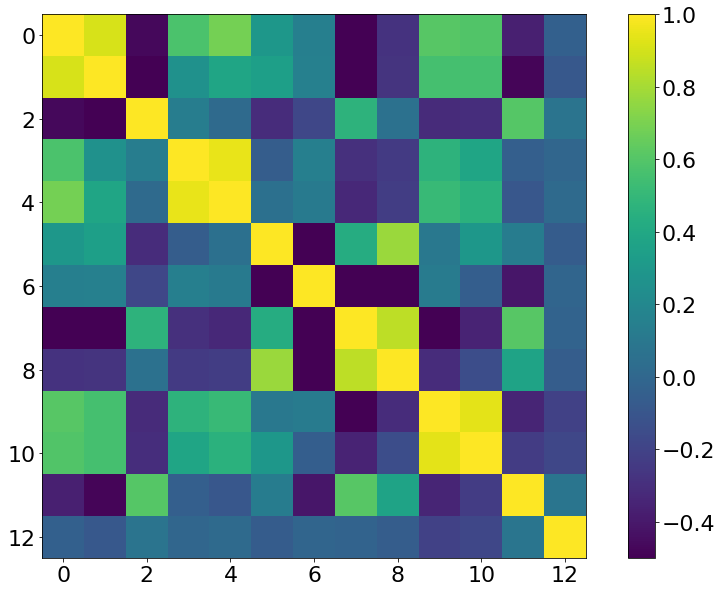

In [69]:
f, ax = plt.subplots(figsize=(15,10))
im1 = ax.imshow(matrix, vmin=-0.5,vmax=1)
plt.colorbar(im1)
plt.savefig('minnie_feature_corr_matrix.eps')

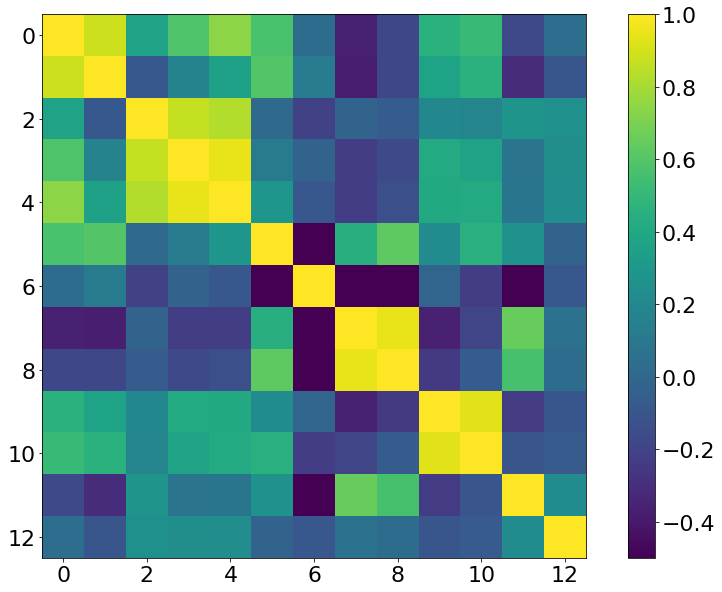

In [70]:
f, ax = plt.subplots(figsize=(15,10))
im2 = ax.imshow(b_matrix, vmin=-0.5,vmax=1)
plt.colorbar(im2)
plt.savefig('basil_feature_corr_matrix.eps')

### Error UMAP

In [35]:
cell_merged_minnie = pd.read_pickle('/Users/leilae/aibs/Neural_coding/data/cell_merged_minnie_features_w_embedding_011822.pkl')

In [45]:
old_minnie = pd.read_pickle('/Users/leilae/aibs/Neural_coding/data/filtered_nuc_minnie_paper_120621.pkl')
minnie_errors = pd.read_pickle('/Users/leilae/aibs/Neural_coding/data/minnie_w_errors_classified_060622.pkl')
#minnie_val = pd.read_pickle('/Users/leilae/aibs/Neural_coding/data/minnie_val_classified_060322.pkl')

In [46]:
minnie_errors.shape

(129769, 82)

In [ ]:
df = df.query('soma_object_preds !=0 & soma_soma_merge==False & frac_zeros < 0.2 & cell_merged == True')

In [47]:
minnie_errors.query('soma_soma_merge==True').shape

(3852, 82)

In [271]:
minnie_errors.columns

Index(['nucleus_area', 'nucleus_area_to_volume', 'nucleus_center_mass_nm',
       'nucleus_fold_area', 'nucleus_fract_fold', 'nucleus_id',
       'nucleus_volume', 'cleft_segid', 'size', 'centroid_x', 'centroid_y',
       'centroid_z', 'yr_um_translated', 'predict', 'is_watertight',
       'soma_center_mass', 'soma_volume', 'soma_area', 'soma_area_to_volume',
       'num_processes', 'avg_sdf', 'orients', 'vectors', 'n_soma_syn',
       'soma_syn_density', 'nuc_id_x', 'seg_id', 'soma_y', 'soma_x', 'soma_z',
       'xr', 'yr', 'soma_to_nuc_volume', 'flat_nuc_id', 'ctr_pt_id',
       'nuc_id_y', 'cell_id', 'centroid', 'message', 'cell_frac',
       'cell_merged', 'dist_from_border', 'dist_from_lr_border',
       'dist_from_fb_border', 'dist_from_white_border', 'dist_from_pia_border',
       'frac_zeros', 'nuc_id', 'id', 'valid', 'pt_supervoxel_id', 'pt_root_id',
       'volume', 'pt_position', 'bb_start_position', 'bb_end_position',
       'soma_to_nuc_d', 'nucleus_to_soma', 'soma_area_mi

In [268]:
minnie_errors.shape, minnie_val.shape

((129769, 79), (89146, 67))

In [272]:
metrics = ['yr_um_translated', 'n_soma_syn', 'soma_area_microns', 'soma_area_to_volume',
           'soma_syn_density_microns', 'soma_volume_microns', 'nucleus_area', 
           'nucleus_area_to_volume','nucleus_fold_area', 'nucleus_fract_fold',
           'nucleus_volume', 'nucleus_to_soma_microns','soma_to_nuc_d']
soma_minnie = minnie_errors[metrics].values

In [273]:
#Minnie fit - minnie based zscores - transform all
means_soma_minnie=np.mean(soma_minnie, axis=0)
stds_soma_minnie=np.std(soma_minnie, axis=0)
M_soma_minnie = (soma_minnie - means_soma_minnie)/stds_soma_minnie

soma_minnie_umap = umap.UMAP(min_dist=0, n_epochs=300).fit(M_soma_minnie)
soma_transform_minnie = soma_minnie_umap.transform(M_soma_minnie)

In [274]:
minnie_errors['soma_minnie_embedding_0'] =soma_transform_minnie[:,0]
minnie_errors['soma_minnie_embedding_1'] =soma_transform_minnie[:,1]

In [275]:
minnie_errors.soma_object_preds.value_counts()

1    74590
2    29142
0    26037
Name: soma_object_preds, dtype: int64

[Text(0.5, 0, 'UMAP 1'), Text(0, 0.5, 'UMAP 2')]

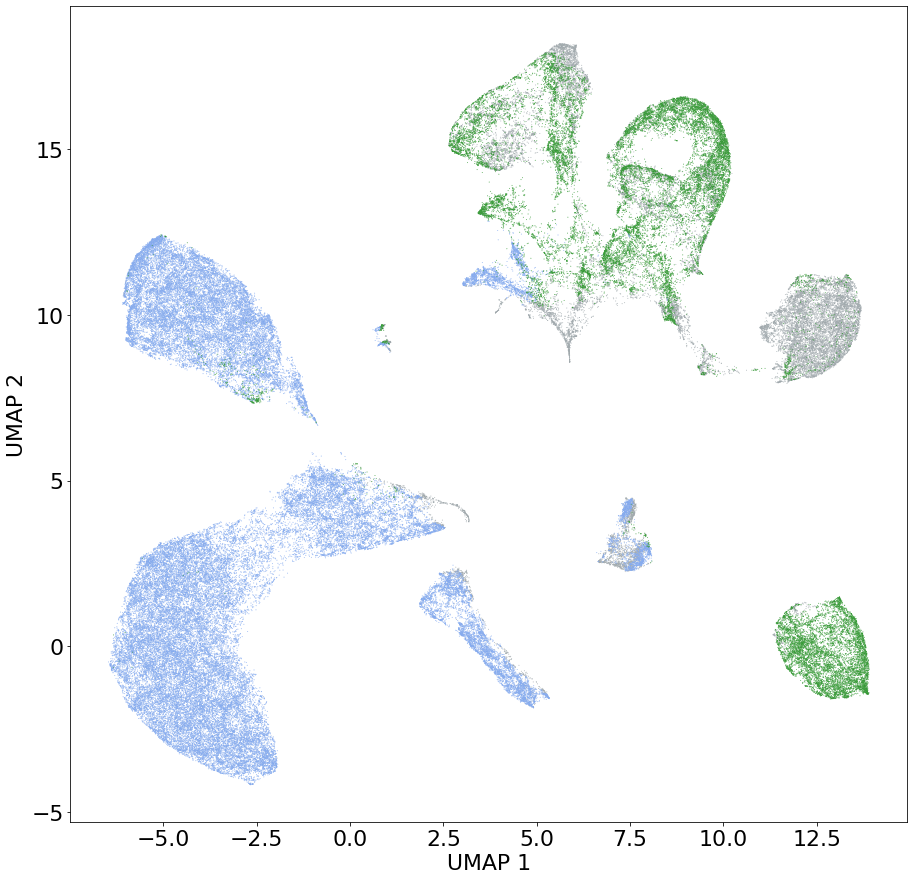

In [276]:
color_dict = {0:'#899499',
              1:'cornflowerblue',
              2:'green'
}

f,ax=plt.subplots(figsize=(15,15))
ax = sns.scatterplot(x='soma_minnie_embedding_0', y='soma_minnie_embedding_1', data=minnie_errors.sort_values('soma_object_preds'),
                     s=1, ax=ax, legend=False, hue='soma_object_preds', palette = color_dict,
                     alpha = 0.7)

#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='UMAP 1', ylabel='UMAP 2')
#ax.set(xlim=(-8,24), ylim=(-8,17))
#f.savefig('/Users/leilae/Documents/Mouse_connectomics/Soma_Nuc_paper/Figures/Supplemental_figures/all_minnie_soma_preds_w_errors_mergers.png', bbox_inches="tight")

In [286]:
mergers = minnie_errors.query('soma_minnie_embedding_0 > 6.0 & soma_minnie_embedding_0 <9.0 & soma_minnie_embedding_1 > 2.3 & soma_minnie_embedding_1 < 5')
is_merger = minnie_errors.nucleus_id.isin(mergers.nucleus_id.tolist())
minnie_errors['soma_soma_merge'] = is_merger

In [287]:
in_val = minnie_errors.nucleus_id.isin(minnie_val.nucleus_id.tolist())
not_val =  minnie_errors[~in_val]

In [288]:
not_val.soma_soma_merge.value_counts()

False    40022
True       715
Name: soma_soma_merge, dtype: int64

In [289]:
minnie_val.soma_soma_merge.value_counts()

False    84955
True      2889
Name: soma_soma_merge, dtype: int64

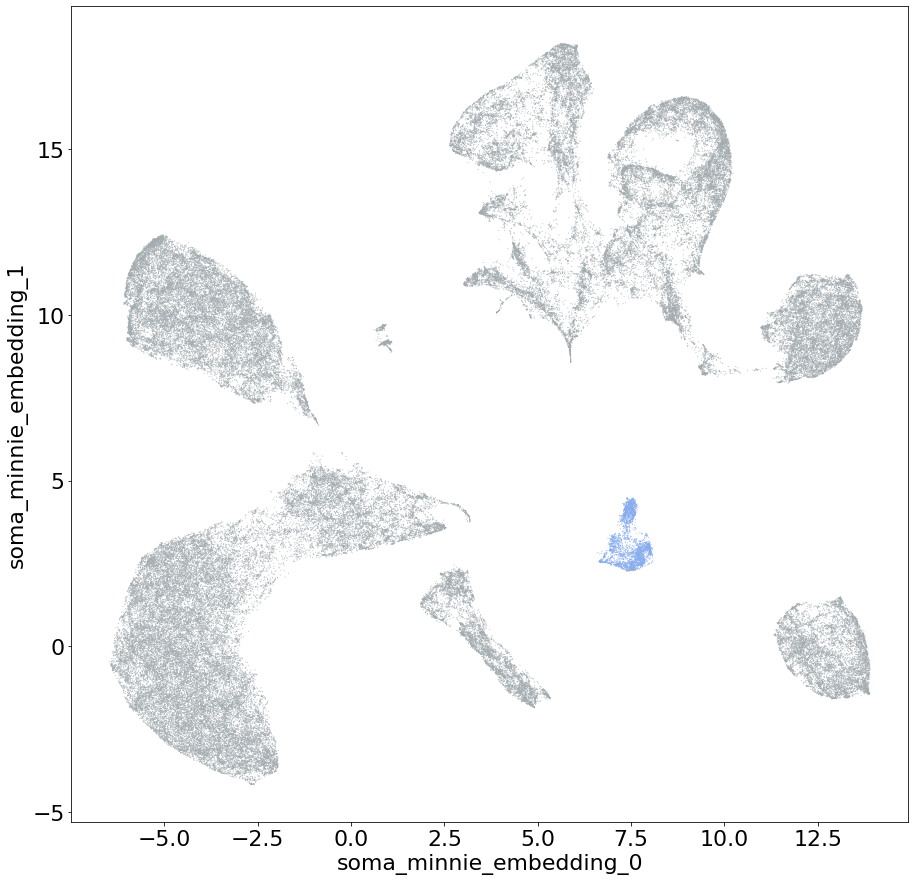

In [290]:

f,ax=plt.subplots(figsize=(15,15))
ax = sns.scatterplot(x='soma_minnie_embedding_0', y='soma_minnie_embedding_1', data=minnie_errors.sort_values('soma_object_preds'),
                     s=1, ax=ax, legend=False, hue='soma_soma_merge', palette = color_dict,
                     alpha = 0.7)

In [291]:
minnie_errors.to_pickle('/Users/leilae/aibs/Neural_coding/data/minnie_w_errors_classified_060622.pkl')

### Soma Metamodel Prediction UMAP

In [18]:
minnie_errors = pd.read_pickle('/Users/leilae/aibs/Neural_coding/data/minnie_w_errors_classified_060622.pkl')

In [19]:
no_error_minnie = minnie_errors.query('soma_object_preds !=0 & soma_soma_merge==False & frac_zeros < 0.2 & cell_merged == True')

In [20]:
no_error_minnie.shape

(82454, 82)

In [21]:
metrics = ['yr_um_translated', 'n_soma_syn', 'soma_area_microns', 'soma_area_to_volume',
           'soma_syn_density_microns', 'soma_volume_microns', 'nucleus_area', 
           'nucleus_area_to_volume','nucleus_fold_area', 'nucleus_fract_fold',
           'nucleus_volume', 'nucleus_to_soma_microns','soma_to_nuc_d']

soma_minnie = no_error_minnie[metrics].values


In [22]:
#Minnie fit - minnie based zscores - transform all
means_soma_minnie=np.mean(soma_minnie, axis=0)
stds_soma_minnie=np.std(soma_minnie, axis=0)
M_soma_minnie = (soma_minnie - means_soma_minnie)/stds_soma_minnie

soma_minnie_umap = umap.UMAP(min_dist=0, n_components=2, n_epochs=400).fit(M_soma_minnie)
soma_transform_minnie = soma_minnie_umap.transform(M_soma_minnie)

/Users/leilae/anaconda3/envs/micronsbinder/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9100. The TBB threading layer is disabled.
  warnings.warn(problem)


In [23]:
no_error_minnie['soma_minnie_embedding_0'] =soma_transform_minnie[:,0]
no_error_minnie['soma_minnie_embedding_1'] =soma_transform_minnie[:,1]
#no_error_minnie['soma_minnie_embedding_2'] =soma_transform_minnie[:,2]
#no_error_minnie['soma_minnie_embedding_3'] =soma_transform_minnie[:,3]

/Users/leilae/anaconda3/envs/micronsbinder/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [24]:
no_error_minnie.soma_nonneuron_class_preds.value_counts()

1.0    7699
2.0    3535
3.0    2727
0.0    1598
4.0     195
Name: soma_nonneuron_class_preds, dtype: int64

In [25]:
no_error_minnie.soma_nonneuron_class_preds.iloc[10]

nan

In [26]:
non_labels = ['OPC','astrocyte','microglia','oligo','pericyte']
neu_labels = ['excitatory', 'inhibitory']
ex_labels = ['23P','4P','5P-IT','5P-NP','5P-PT','6P-CT','6P-IT']
inh_labels = ['BC','BPC','MC', 'NGC']

soma_ct_preds = []
soma_class_gt = []

for ix,i in enumerate(no_error_minnie.soma_object_preds):
    if i == 0:
        soma_ct_preds.append('error')
    elif i == 2:
        pred = no_error_minnie.soma_nonneuron_class_preds.iloc[ix]
        soma_ct_preds.append(non_labels[int(pred)])
    elif i ==1:
        #print(metamodel_df.metamodel_neuron_class_preds.iloc[ix])
        if no_error_minnie.soma_neuron_class_preds.iloc[ix] == 0:
            pred = no_error_minnie.soma_ex_subclass_preds.iloc[ix]
            soma_ct_preds.append(ex_labels[int(pred)])
            
            #pred = metamodel_df.metamodel_neuron_class_preds.iloc[ix]
            #metamodel_ct_preds.append(neu_labels[0])
            
        elif no_error_minnie.soma_neuron_class_preds.iloc[ix] == 1:
            pred = no_error_minnie.soma_inh_subclass_preds.iloc[ix]
            soma_ct_preds.append(inh_labels[int(pred)])
            
            #pred = metamodel_df.metamodel_neuron_class_preds.iloc[ix]
            #metamodel_ct_preds.append(neu_labels[1])

no_error_minnie['cell_type_leaf_preds'] = soma_ct_preds

gt = []
for ix,i in enumerate(no_error_minnie.cell_type):
    if type(i) == str:
        gt.append(i)
    elif no_error_minnie.classification_system.iloc[ix] == 'aibs_coarse_error':
        gt.append('error')
    else:
        gt.append(None)

no_error_minnie['cell_type_leaf_gt'] = gt

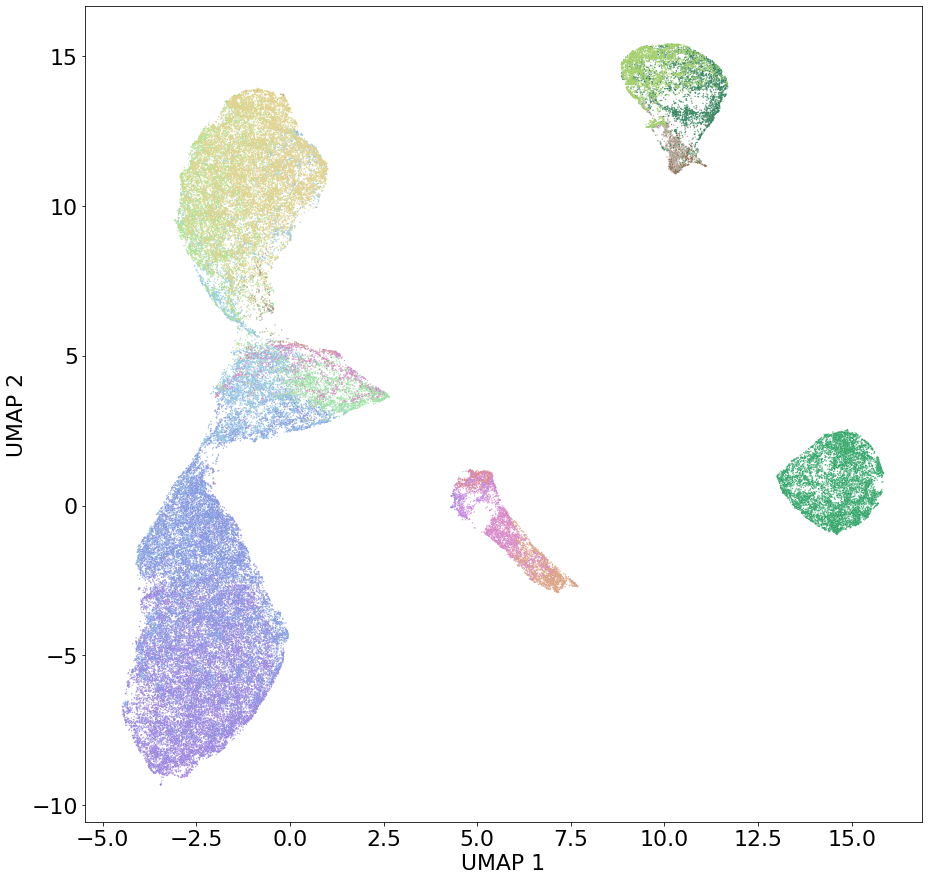

In [29]:
color_dict = {'23P':'#8268DC',
              '4P':'#647FDC',
              '5P-IT':'#77BCDE',
              '5P-PT':'#87DD90',
              '5P-NP':'#85DEC9',
              '6P-CT':'#96DD70',
              '6P-IT':'#DCC86E',
              'BC':'#D68C66',
              'BPC':'#D3697C',
              'MC':'#D36BBA',
              'NGC':'#BC6BDB',
              'astrocyte':'#009245',
              'pericyte':'#754C24',
              'microglia':'#006837',
              'oligo':'#8CC63F',
              'OPC':'#998675',
              'error':'#899499'
    
}

f,ax=plt.subplots(figsize=(15,15))
ax = sns.scatterplot(x='soma_minnie_embedding_0', y='soma_minnie_embedding_1', data=no_error_minnie.sort_values('cell_type_leaf_preds'),
                     s=2, ax=ax, legend=False, hue='cell_type_leaf_preds', palette = color_dict,
                     alpha = 0.7)

#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='UMAP 1', ylabel='UMAP 2')
f.savefig('/Users/leilae/Documents/Mouse_connectomics/Soma_Nuc_paper/Figures/Supplemental_figures/all_minnie_soma_preds_no_errors.png', bbox_inches="tight")

In [238]:
odd = no_error_minnie.query('soma_minnie_embedding_1 > 10 & soma_minnie_embedding_0 > 3')
non = odd.cell_type_leaf_preds.isin(non_labels)

odd = odd[~non]
odd.cell_type_leaf_preds.value_counts()

4P       509
23P      416
6P-CT    295
5P-IT    106
6P-IT      4
BPC        1
MC         1
5P-NP      1
Name: cell_type_leaf_preds, dtype: int64

/Users/leilae/anaconda3/envs/micronsbinder/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/leilae/anaconda3/envs/micronsbinder/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:906: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/Users/leilae/anaconda3/envs/micronsbinder/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:908: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/Users/leilae/anaconda3/envs/micronsbinder/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:910: FutureWarning: elementwise compari

<Axes3DSubplot:>

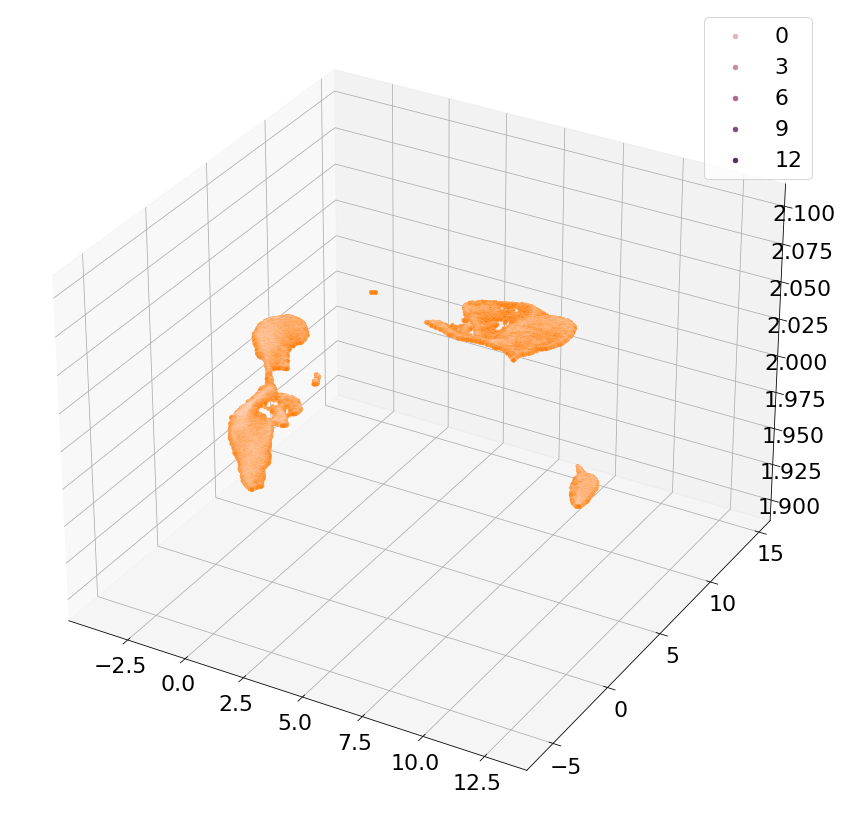

In [162]:
u = soma_transform_minnie
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
sns.scatterplot(soma_transform_minnie[:,0], soma_transform_minnie[:,1],soma_transform_minnie[:,2], data=no_error_minnie.sort_values('cell_type_leaf_preds'),
                     s=2, ax=ax,  alpha = 0.7, hue='cell_type_leaf_preds')